## Problem Statement 

You need to build a model that is able to classify customer complaints based on the products/services. By doing so, you can segregate these tickets into their relevant categories and, therefore, help in the quick resolution of the issue.

You will be doing topic modelling on the <b>.json</b> data provided by the company. Since this data is not labelled, you need to apply NMF to analyse patterns and classify tickets into the following five clusters based on their products/services:

* Credit card / Prepaid card

* Bank account services

* Theft/Dispute reporting

* Mortgages/loans

* Others 


With the help of topic modelling, you will be able to map each ticket onto its respective department/category. You can then use this data to train any supervised model such as logistic regression, decision tree or random forest. Using this trained model, you can classify any new customer complaint support ticket into its relevant department.

## Pipelines that needs to be performed:

You need to perform the following eight major tasks to complete the assignment:

1.  Data loading

2. Text preprocessing

3. Exploratory data analysis (EDA)

4. Feature extraction

5. Topic modelling 

6. Model building using supervised learning

7. Model training and evaluation

8. Model inference

## Importing the necessary libraries

In [223]:
import json 
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_sm
nlp = en_core_web_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from pprint import pprint
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import nltk
from nltk.util import ngrams

#Model Building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report

## Loading the data

The data is in JSON format and we need to convert it to a dataframe.

In [224]:
# Opening JSON file 
f = open('complaints-2021-05-14_08_16.json','r')
  
# returns JSON object as  
# a dictionary 
data = json.load(f)
df=pd.json_normalize(data)

## Data preparation

In [225]:
# Inspecting the dataframe to understand the given data
df.head()

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [226]:
df.shape

(78313, 22)

The dataset has 78313 rows and 22 columns.

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _index                             78313 non-null  object 
 1   _type                              78313 non-null  object 
 2   _id                                78313 non-null  object 
 3   _score                             78313 non-null  float64
 4   _source.tags                       10900 non-null  object 
 5   _source.zip_code                   71556 non-null  object 
 6   _source.complaint_id               78313 non-null  object 
 7   _source.issue                      78313 non-null  object 
 8   _source.date_received              78313 non-null  object 
 9   _source.state                      76322 non-null  object 
 10  _source.consumer_disputed          78313 non-null  object 
 11  _source.product                    78313 non-null  obj

In [228]:
df.shape

(78313, 22)

In [229]:
#Print the column names
for column in enumerate(df.columns):
    print(column)

(0, '_index')
(1, '_type')
(2, '_id')
(3, '_score')
(4, '_source.tags')
(5, '_source.zip_code')
(6, '_source.complaint_id')
(7, '_source.issue')
(8, '_source.date_received')
(9, '_source.state')
(10, '_source.consumer_disputed')
(11, '_source.product')
(12, '_source.company_response')
(13, '_source.company')
(14, '_source.submitted_via')
(15, '_source.date_sent_to_company')
(16, '_source.company_public_response')
(17, '_source.sub_product')
(18, '_source.timely')
(19, '_source.complaint_what_happened')
(20, '_source.sub_issue')
(21, '_source.consumer_consent_provided')


In [231]:
#Assigning new column names
#Remove _ and _source from column names

df.columns = [col.replace('_source.', '').replace('_','') for col in df.columns]

In [232]:
#Column: complaintwhathappened is the main column on which we will work
#Shorten it: rename it to 'complaint' 
df.rename(columns={"complaintwhathappened":"complaints"},inplace=True)
for column in enumerate(df.columns):
    print(column)

(0, 'index')
(1, 'type')
(2, 'id')
(3, 'score')
(4, 'tags')
(5, 'zipcode')
(6, 'complaintid')
(7, 'issue')
(8, 'datereceived')
(9, 'state')
(10, 'consumerdisputed')
(11, 'product')
(12, 'companyresponse')
(13, 'company')
(14, 'submittedvia')
(15, 'datesenttocompany')
(16, 'companypublicresponse')
(17, 'subproduct')
(18, 'timely')
(19, 'complaints')
(20, 'subissue')
(21, 'consumerconsentprovided')


In [233]:
#Assign nan in place of blanks in the complaints column
df['complaints'].replace("",np.nan, inplace=True)
df['complaints'].isnull().sum()

57241

Out of the 78313 rows of data, 57241 were blank. Now, we remove these rows.

In [234]:
#Remove all rows where complaints column is nan
df.dropna(subset=['complaints'], inplace = True)
df['complaints'].isnull().sum()

0

In [235]:
df.shape

(21072, 22)

Now, only 21072 records of written individual complaints are present in the dataset.

## Prepare the text for topic modeling

Once you have removed all the blank complaints, you need to:

* Make the text lowercase
* Remove text in square brackets
* Remove punctuation
* Remove words containing numbers


Once you have done these cleaning operations you need to perform the following:
* Lemmatize the texts
* Extract the POS tags of the lemmatized text and remove all the words which have tags other than NN[tag == "NN"].


In [237]:
# Clean the text and remove all the unnecessary elements.

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters using regex
    text = re.sub(r'[^\w\s]', '', text)
    # Remove leading and trailing whitespace
    text = text.strip()
    return text

# Apply the function to column 'complaints'
df['complaints'] = df['complaints'].apply(lambda x: clean_text(x) if pd.notnull(x) else x)

In [238]:
#Lemmatize the texts
def lemmatize_texts(text):     
        
    lemma_list = []
    
    # Extract lemmas of given text and add to the list 'sent'
    document = nlp(text)
    for word in document:
        lemma_list.append(word.lemma_)
        
    # return string converted form of the list of lemmas
    return " ".join(lemma_list)

# Apply the function to column 'complaints' and create a new column 'lemmatized column' for the lammatized text
df['lemmatized_complaints'] = df.apply(lambda x: lemmatize_texts(x['complaints']), axis = 1)

In [239]:
#Dataframe('df_clean') that will have only the complaints and the lemmatized complaints 
df_clean=df[['complaints','lemmatized_complaints']]

In [240]:
pd.set_option('display.max_colwidth', None)

In [241]:
df_clean.head()

,complaints,lemmatized_complaints
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin 2018 i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning my name be xxxx xxxx and I appreciate it if you could help I put a stop to chase bank cardmember service \n in 2018 I write to chase ask for debt verification and what they send I a statement which be not acceptable I be ask the bank to validate the debt instead I been receive mail every month from they attempt to collect a debt \n I have a right to know this information as a consumer \n\n chase account xxxx xxxx xxxx xxxx thank in advance for your help
2,i upgraded my xxxx xxxx card in xxxx2018 and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,I upgrade my xxxx xxxx card in xxxx2018 and be tell by the agent who do the upgrade my anniversary date would not change it turn the agent be give I the wrong information in order to upgrade the account xxxx change my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx have the recording of the agent who be mislead I
10,chase card was reported on xxxx2019 however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card be report on xxxx2019 however fraudulent application have be submit my identity without my consent to fraudulently obtain service do not extend credit without verify the identity of the applicant
11,on xxxx2018 while trying to book a xxxx xxxx ticket i came across an offer for 30000 to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than 10minutes of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than 10mins after putting in the application on xxxx2018 notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on xxxx2018 this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,on xxxx2018 while try to book a xxxx xxxx ticket I come across an offer for 30000 to be apply towards the ticket if I apply for a reward card I put in my information for the offer and within less than a minute be notify via the screen that a decision could not be make I immediately contact xxxx and be refer to chase bank I then immediately contact chase bank within no more than 10minute of get the notification on the sc

In [242]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/I076199/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [243]:
#This function will extract the POS tags and remove all words with POS != 'NN' from lemmatized text 

def pos_tag(text):
    text_blob = TextBlob(text)
    return ' '.join([word for(word,tag) in text_blob.tags if tag == 'NN'])

#this column contains lemmatized text with all the words removed which have tags other than NN[tag == "NN"].
df_clean["complaint_POS_removed"] = df_clean.apply(lambda x: pos_tag(x['lemmatized_complaints']), axis = 1)

/var/folders/4s/jwcqmfxx0sn21fklt1l7kj0c0000gn/T/ipykernel_32134/448815383.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [244]:
#The clean dataframe should now contain the raw complaint, lemmatized complaint and the complaint after removing POS tags.
df_clean.head()

,complaints,lemmatized_complaints,complaint_POS_removed
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin 2018 i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning my name be xxxx xxxx and I appreciate it if you could help I put a stop to chase bank cardmember service \n in 2018 I write to chase ask for debt verification and what they send I a statement which be not acceptable I be ask the bank to validate the debt instead I been receive mail every month from they attempt to collect a debt \n I have a right to know this information as a consumer \n\n chase account xxxx xxxx xxxx xxxx thank in advance for your help,morning name stop bank cardmember service ask debt verification statement bank debt mail month debt right information consumer chase account thank advance help
2,i upgraded my xxxx xxxx card in xxxx2018 and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,I upgrade my xxxx xxxx card in xxxx2018 and be tell by the agent who do the upgrade my anniversary date would not change it turn the agent be give I the wrong information in order to upgrade the account xxxx change my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx have the recording of the agent who be mislead I,card xxxx2018 agent upgrade date agent information order account change date xxxxxxxx consent xxxx recording agent
10,chase card was reported on xxxx2019 however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card be report on xxxx2019 however fraudulent application have be submit my identity without my consent to fraudulently obtain service do not extend credit without verify the identity of the applicant,card application identity consent service credit identity applicant
11,on xxxx2018 while trying to book a xxxx xxxx ticket i came across an offer for 30000 to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than 10minutes of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than 10mins after putting in the application on xxxx2018 notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on xxxx2018 this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,on xxxx2018 while try to book a xxxx xxxx ticket I come ac

## Exploratory data analysis to get familiar with the data.

Write the code in this task to perform the following:

*   Visualise the data according to the 'Complaint' character length
*   Using a word cloud find the top 40 words by frequency among all the articles after processing the text
*   Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text. ‘




In [245]:
# Create a column to store character length of complaints
# Note: The complaints column to work on after lemmatization is 'complaint_POS_removed'

df_clean = df_clean.copy()
df_clean['char_length'] = df_clean['complaint_POS_removed'].astype(str).apply(len)
df_clean.describe()

,char_length
count,21072.000000
mean,426.573415
std,487.189506
min,0.000000
25%,161.000000
50%,299.000000
75%,533.000000
max,12825.000000


We can see that the average character length is less than 500. Let us also visualize this trend in character length.

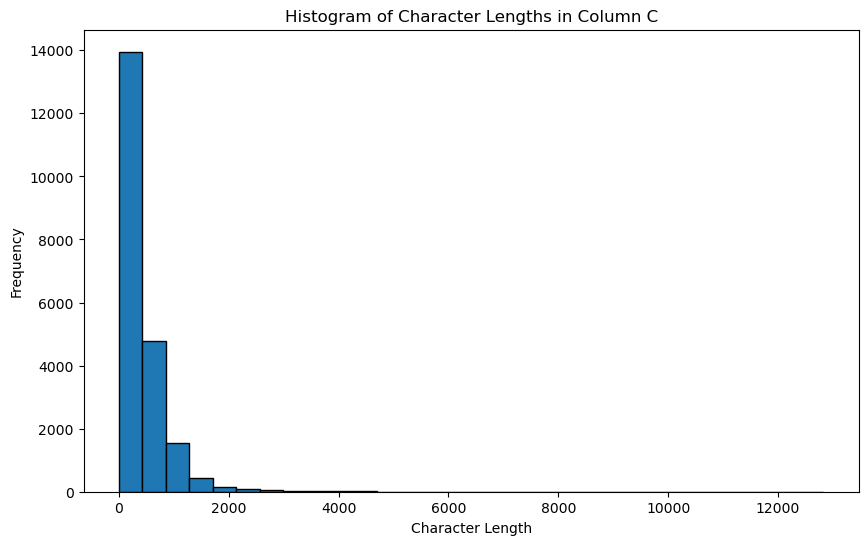

In [246]:
# Visualise the data according to the 'Complaint' character length

plt.figure(figsize=(10, 6))
plt.hist(df_clean['char_length'], bins=30, edgecolor='k')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.title('Histogram of Character Lengths in Column C')
plt.show()


We now know that average character length is less than 500. Let's see the frequency breakdown of such sentences.

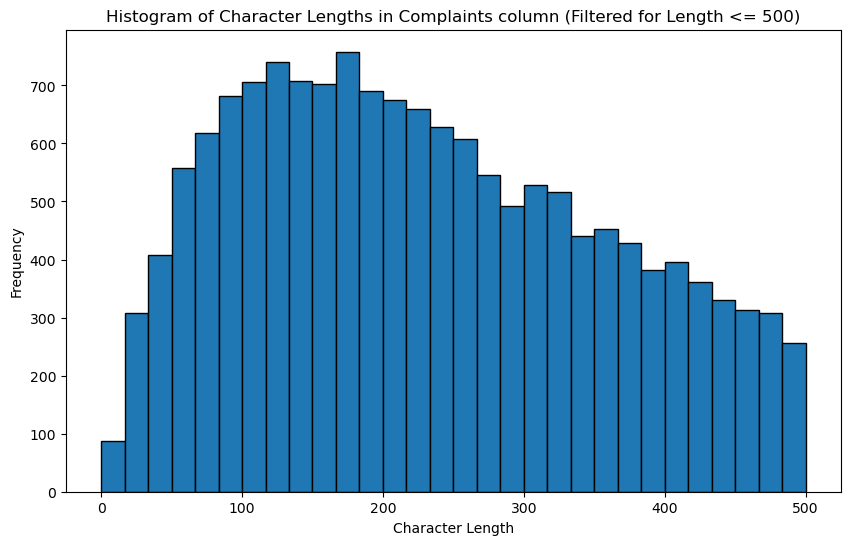

In [247]:
filtered_lengths = df_clean[df_clean['char_length'] <= 500]['char_length']

plt.figure(figsize=(10, 6))
plt.hist(filtered_lengths, bins=30, edgecolor='k')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.title('Histogram of Character Lengths in Complaints column (Filtered for Length <= 500)')
plt.show()

#### Find the top 40 words by frequency among all the articles after processing the text.

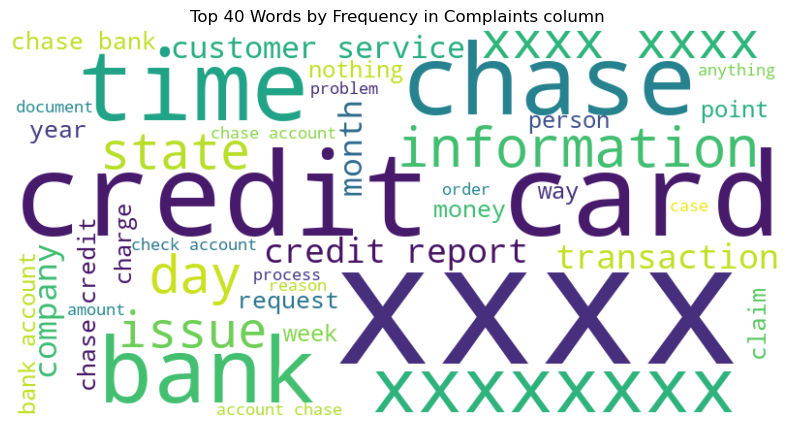

In [248]:
#Using a word cloud to find the top 40 words by frequency among all the articles after processing the text
text = ' '.join(df_clean['complaint_POS_removed'].dropna().astype(str).tolist())

# Step 3: Define stop words
stopwords = set(STOPWORDS)

# Step 4: Generate the word cloud
wordcloud = WordCloud(width=800, height=400, 
                      max_words=40, 
                      stopwords=stopwords, 
                      background_color='white').generate(text)

# Step 5: Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words by Frequency in Complaints column')
plt.show()

In [249]:
#Removing -PRON- from the text corpus
df_clean['Complaint_clean'] = df_clean['complaint_POS_removed'].str.replace('-PRON-', '')

#### Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text.

In [251]:
# Combine all text into a single string
ngram_text = ' '.join(df_clean['Complaint_clean'].dropna().astype(str).tolist())

# Tokenize the text
words = nltk.word_tokenize(ngram_text)

#Finding the top 30 unigram frequency among the complaints in the cleaned datafram(df_clean). 
unigrams = words
unigram_freq = Counter(unigrams)
top_30_unigrams = unigram_freq.most_common(30)

In [252]:
# Function to plot the top 30 ngrams for visualization
def plot_ngrams(ngram_freq, title):
    ngrams_words, counts = zip(*ngram_freq)
    ngrams_words = [' '.join(ngram) if isinstance(ngram, tuple) else ngram for ngram in ngrams_words]
    plt.figure(figsize=(12, 8))
    plt.barh(ngrams_words, counts)
    plt.xlabel('Frequency')
    plt.ylabel('N-grams')
    plt.title(title)
    plt.gca().invert_yaxis()  # Invert y-axis to have the most frequent n-gram on top
    plt.show()

In [253]:
#Print the top 10 words in the unigram frequency
df_unigram = pd.DataFrame(top_30_unigrams, columns = ['Unigram' , 'Count'])
df_unigram.head(10)

,Unigram,Count
0,account,47528
1,chase,46956
2,xxxx,37499
3,credit,34153
4,card,29304
5,bank,28410
6,payment,21170
7,time,16027
8,charge,15011
9,day,12977


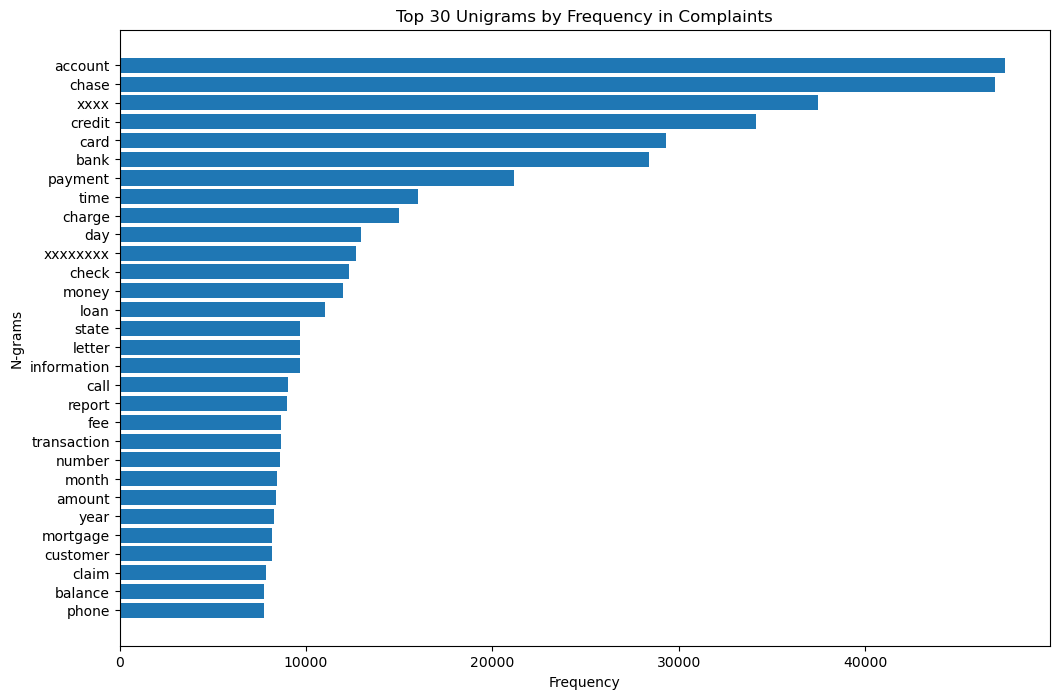

In [254]:
#Visulaize the unigrams
plot_ngrams(top_30_unigrams, 'Top 30 Unigrams by Frequency in Complaints')

In [255]:
#Finding the top 30 bigram frequency among the complaints in the cleaned datafram(df_clean). 
bigrams_list = list(ngrams(words, 2))
bigram_freq = Counter(bigrams_list)
top_30_bigrams = bigram_freq.most_common(30)

In [256]:
#Print the top 10 words in the bigram frequency
df_bigram = pd.DataFrame(top_30_bigrams, columns = ['Bigram' , 'Count'])
df_bigram.head(10)

,Bigram,Count
0,"(credit, card)",12774
1,"(xxxx, xxxx)",4321
2,"(credit, report)",3951
3,"(customer, service)",3080
4,"(chase, bank)",3016
5,"(chase, credit)",2938
6,"(bank, account)",2675
7,"(account, chase)",2583
8,"(chase, account)",2507
9,"(check, account)",2352


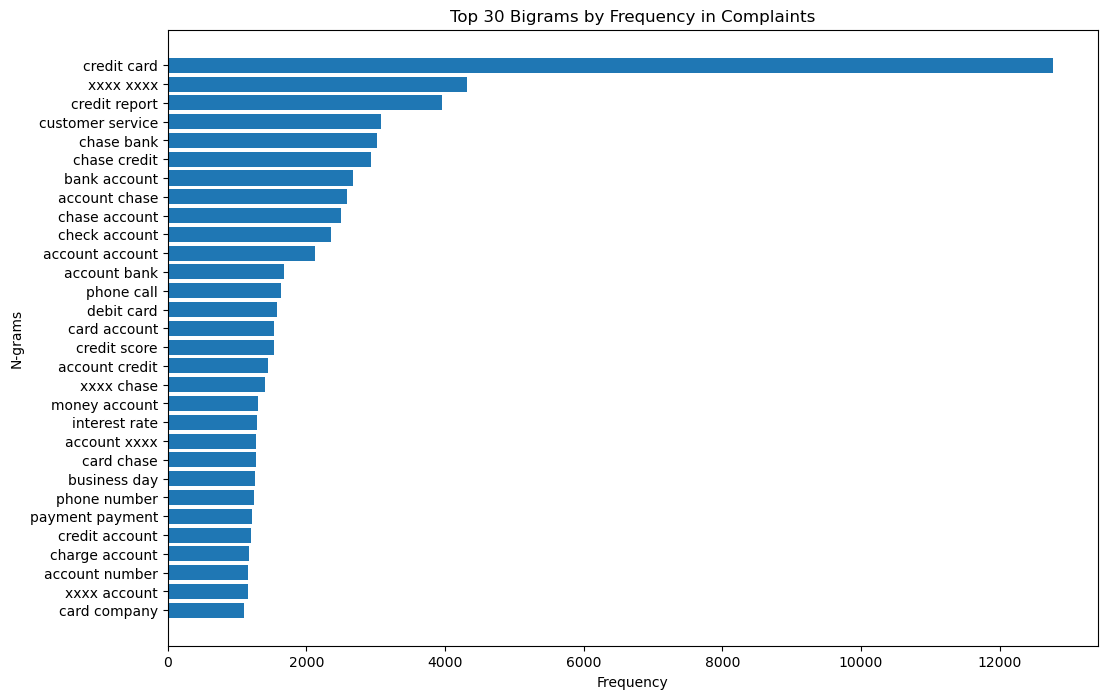

In [257]:
# Visulaize the bigrams
plot_ngrams(top_30_bigrams, 'Top 30 Bigrams by Frequency in Complaints')

In [258]:
#Finding the top 30 trigram frequency among the complaints in the cleaned datafram(df_clean). 
trigrams_list = list(ngrams(words, 3))
trigram_freq = Counter(trigrams_list)
top_30_trigrams = trigram_freq.most_common(30)

In [259]:
#Print the top 10 words in the trigram frequency
df_trigram = pd.DataFrame(top_30_trigrams, columns = ['Trigram' , 'Count'])
df_trigram.head(10)

,Trigram,Count
0,"(chase, credit, card)",2063
1,"(credit, card, account)",999
2,"(credit, card, company)",985
3,"(credit, card, chase)",615
4,"(xxxx, xxxx, xxxx)",561
5,"(inquiry, credit, report)",477
6,"(credit, card, credit)",474
7,"(charge, credit, card)",409
8,"(account, credit, card)",408
9,"(credit, reporting, agency)",384


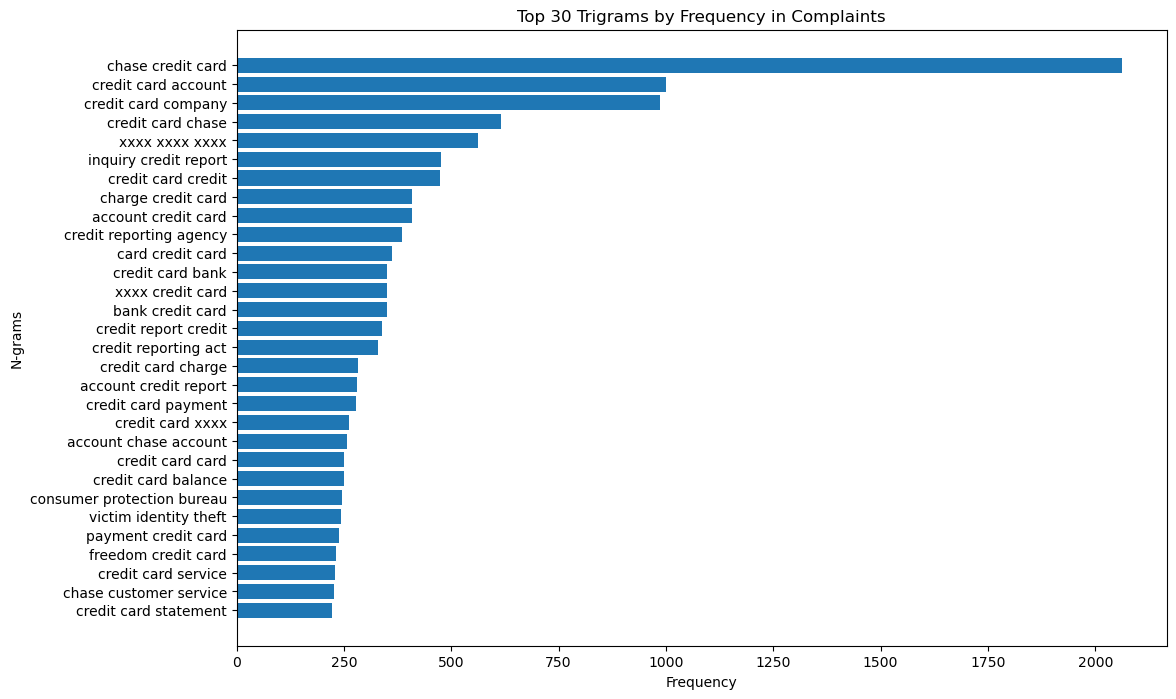

In [260]:
# Visualize the tigrams
plot_ngrams(top_30_trigrams, 'Top 30 Trigrams by Frequency in Complaints')

## The personal details of customer has been masked in the dataset with xxxx. Let's remove the masked text as this will be of no use for our analysis

In [261]:
df_clean['Complaint_clean'] = df_clean['Complaint_clean'].str.replace('xxxx','')

In [262]:
#All masked texts has been removed
df_clean.head(2)

,complaints,lemmatized_complaints,complaint_POS_removed,char_length,Complaint_clean
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin 2018 i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning my name be xxxx xxxx and I appreciate it if you could help I put a stop to chase bank cardmember service \n in 2018 I write to chase ask for debt verification and what they send I a statement which be not acceptable I be ask the bank to validate the debt instead I been receive mail every month from they attempt to collect a debt \n I have a right to know this information as a consumer \n\n chase account xxxx xxxx xxxx xxxx thank in advance for your help,morning name stop bank cardmember service ask debt verification statement bank debt mail month debt right information consumer chase account thank advance help,159,morning name stop bank cardmember service ask debt verification statement bank debt mail month debt right information consumer chase account thank advance help
2,i upgraded my xxxx xxxx card in xxxx2018 and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,I upgrade my xxxx xxxx card in xxxx2018 and be tell by the agent who do the upgrade my anniversary date would not change it turn the agent be give I the wrong information in order to upgrade the account xxxx change my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx have the recording of the agent who be mislead I,card xxxx2018 agent upgrade date agent information order account change date xxxxxxxx consent xxxx recording agent,114,card 2018 agent upgrade date agent information order account change date consent recording agent


## Feature Extraction
Convert the raw texts to a matrix of TF-IDF features

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

**min_df** is used for removing terms that appear too infrequently
min_df = 2 means "ignore terms that appear in less than 2 complaints"

In [263]:
#Initialise the TfidfVectorizer 
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english', ngram_range = (1,3))

#### Create a document term matrix using fit_transform

The contents of a document term matrix are tuples of (complaint_id,token_id) tf-idf score:
The tuples that are not there have a tf-idf score of 0

In [264]:
#Create the Document Term Matrix by transforming the complaints column present in df_clean.
tfidf_matrix = tfidf.fit_transform(df_clean['Complaint_clean'])

## Topic Modelling using NMF

Non-Negative Matrix Factorization (NMF) is an unsupervised technique so there are no labeling of topics that the model will be trained on. The way it works is that, NMF decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.

In this task you have to perform the following:

* Find the best number of clusters 
* Apply the best number to create word clusters
* Inspect & validate the correction of each cluster wrt the complaints 
* Correct the labels if needed 
* Map the clusters to topics/cluster names

In [265]:
from sklearn.decomposition import NMF

## Manual Topic Modeling
You need to do take the trial & error approach to find the best num of topics for your NMF model.

The only parameter that is required is the number of components i.e. the number of topics we want. This is the most crucial step in the whole topic modeling process and will greatly affect how good your final topics are.

In [266]:
#Load your nmf_model with the n_components i.e 5
num_topics = 5 #write the value you want to test out

#keep the random_state =40
nmf_model = NMF(n_components=num_topics, random_state=40)

In [267]:
nmf_model.fit(tfidf_matrix)

NMF(n_components=5, random_state=40)

In [268]:
# Print the H matrix of shape k x n 
# where k is the number of topics and 
# n is the number of terms in all the documents
nmf_model.components_.shape

(5, 197930)

In [269]:
# Display the H matrix
# Columns: Terms
# Rows: Topics
components_df=pd.DataFrame(nmf_model.components_, columns=tfidf.get_feature_names_out())
components_df.head()

,10,11,12,13,14,14 payment,15,15 15,15 15 chase,15 account,...,zip code credit,zip code error,zip code mailing,zip code payment,zip code security,zip file,zipcode,zombie,zone,zoom
0,0.000000,0.000689,0.000268,0.000000,0.001876,0.000146,0.005843,0.000000,0.000000,0.001812,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000021,0.000000,0.000577,0.000136
1,0.000328,0.000424,0.000000,0.000213,0.001171,0.000803,0.001107,0.000732,0.000097,0.000000,...,0.000934,0.000000,0.000000,0.000000,0.000904,0.000222,0.000012,0.001029,0.000000,0.000390
2,0.000781,0.000000,0.000352,0.000169,0.002886,0.000500,0.016122,0.001020,0.000307,0.000300,...,0.000000,0.000573,0.000573,0.001146,0.000258,0.000000,0.000250,0.000768,0.003458,0.000000
3,0.000034,0.000000,0.000000,0.000201,0.000132,0.000132,0.000000,0.000000,0.000087,0.000000,...,0.000143,0.000048,0.000048,0.000096,0.000000,0.000000,0.000034,0.000000,0.000000,0.000000
4,0.000084,0.000000,0.000000,0.000844,0.000000,0.000000,0.010124,0.000674,0.000098,0.000000,...,0.000127,0.000000,0.000000,0.000000,0.000000,0.000655,0.000078,0.000073,0.002987,0.000328


In [270]:
#Print the Top15 words for each of the topics
for topic in range(components_df.shape[0]):
    tmp = components_df.iloc[topic]
    print(f'For topic {topic+1} the Top15 words are:')
    print(tmp.nlargest(15))
    print('\n')

For topic 1 the Top15 words are:
account            2.645940
check              1.537599
bank               1.460477
money              0.993447
fund               0.799719
chase              0.736045
deposit            0.678798
branch             0.575002
day                0.509656
check account      0.452697
bank account       0.450979
account account    0.417516
number             0.369465
business           0.368239
transaction        0.354260
Name: 0, dtype: float64


For topic 2 the Top15 words are:
card                 2.151853
credit               1.798434
credit card          1.454172
chase                0.546936
chase credit         0.478560
chase credit card    0.425664
balance              0.423556
account              0.402172
card credit          0.286776
limit                0.264649
card account         0.263633
card chase           0.253158
score                0.245091
card card            0.241136
payment              0.238438
Name: 1, dtype: float64


For topic 3 

In [271]:
#Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4
#Here, for each complaint, we calculate a score corresponding to every topic
#This is done using the NMF model transform
nmf_features=nmf_model.transform(tfidf_matrix)
nmf_features.shape

(21072, 5)

In [272]:
#Create dataframe from nmf_features for better readbility
df_nmf_features = pd.DataFrame(nmf_features)
df_nmf_features

,0,1,2,3,4
0,0.013023,0.003642,0.009215,0.004540,0.005330
1,0.005762,0.009770,0.002925,0.000579,0.009022
2,0.000000,0.020934,0.000000,0.007307,0.000630
3,0.013571,0.023286,0.007255,0.034618,0.010429
4,0.041403,0.000000,0.001571,0.000000,0.002116
...,...,...,...,...,...
21067,0.000000,0.062087,0.001067,0.000000,0.022071
21068,0.004366,0.014334,0.002674,0.000791,0.039174
21069,0.013315,0.000862,0.004971,0.017743,0.026846
21070,0.000000,0.060720,0.041415,0.000000,0.000000


In [273]:
#Identify best topic for each complaint
df_nmf_features['Highest_value'] = df_nmf_features.apply(lambda x: max([x[0], x[1], x[2], x[3], x[4]]), axis=1)
df_nmf_features['Topic'] = df_nmf_features.apply(lambda x: df_nmf_features.columns[0:4][np.argmax(x[0:4])], axis=1).astype(int)
df_nmf_features.head()

,0,1,2,3,4,Highest_value,Topic
0,0.013023,0.003642,0.009215,0.004540,0.005330,0.013023,0
1,0.005762,0.009770,0.002925,0.000579,0.009022,0.009770,1
2,0.000000,0.020934,0.000000,0.007307,0.000630,0.020934,1
3,0.013571,0.023286,0.007255,0.034618,0.010429,0.034618,3
4,0.041403,0.000000,0.001571,0.000000,0.002116,0.041403,0


In [274]:
#Assign the best topic to each of the complaints in Topic Column
df_clean['Topic'] = df_nmf_features['Topic'].astype(int)

In [275]:
df_clean.head(2)

,complaints,lemmatized_complaints,complaint_POS_removed,char_length,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin 2018 i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning my name be xxxx xxxx and I appreciate it if you could help I put a stop to chase bank cardmember service \n in 2018 I write to chase ask for debt verification and what they send I a statement which be not acceptable I be ask the bank to validate the debt instead I been receive mail every month from they attempt to collect a debt \n I have a right to know this information as a consumer \n\n chase account xxxx xxxx xxxx xxxx thank in advance for your help,morning name stop bank cardmember service ask debt verification statement bank debt mail month debt right information consumer chase account thank advance help,159,morning name stop bank cardmember service ask debt verification statement bank debt mail month debt right information consumer chase account thank advance help,1.0
2,i upgraded my xxxx xxxx card in xxxx2018 and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,I upgrade my xxxx xxxx card in xxxx2018 and be tell by the agent who do the upgrade my anniversary date would not change it turn the agent be give I the wrong information in order to upgrade the account xxxx change my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx have the recording of the agent who be mislead I,card xxxx2018 agent upgrade date agent information order account change date xxxxxxxx consent xxxx recording agent,114,card 2018 agent upgrade date agent information order account change date consent recording agent,1.0


In [276]:
#Print the first 5 Complaint for each of the Topics
df_clean_upd=df_clean.groupby('Topic').head(5)
df_clean_upd.sort_values('Topic')

,complaints,lemmatized_complaints,complaint_POS_removed,char_length,Complaint_clean,Topic
10,chase card was reported on xxxx2019 however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card be report on xxxx2019 however fraudulent application have be submit my identity without my consent to fraudulently obtain service do not extend credit without verify the identity of the applicant,card application identity consent service credit identity applicant,67,card application identity consent service credit identity applicant,0.0
45,i made a purchase with xxxx xxxx xxxx on xxxx2019 in the amount of 3800 i was charged twice for this transaction i placed a disputes case with chase bank on xxxx2019 when i noticed the charge on my account i called back on sunday xxxx2019 about the provisional credit for the charge and again on monday xxxx2019 i was told the charge had to post before a provisional credit could be provided i used my debt card on monday xxxx2019 then tried to use it again but it would not work i went to chase bank on xxxx xxxx xxxx in xxxx xxxx nevada and was told that my account was closed due to fraudulent activity i was shocked because i had not reported fraud on my account i later found out that i was being accused by the disputes department of placing a fraudulent disputes case for the duplicate charge from xxxx xxxx xxxx i later contacted xxxx xxxx xxxx again and was told that they did see a duplicate charge and would credit my account within 3 5 days i contacted the chase disputes department again on monday xxxxxxxx 2019 and explained thaxxxx xxxx xxxx xxxx would credit my account and that i did not like being accused of making a fraudulent disputes claim the escalation manager did not care and told me that chase decision on closing my account was final i had been a customer of chase for xxxx years my character has been challenged by the disputes agents and i consider this to be detrimental to my character and slander \n\ni am not seeking to keep my account open with chase but i also do not want chase reporting that they closed my checking account involuntarily \n\nonce again i do not want chase to have the checking account that i had with them being reflecting on any public records as being closed as involuntary closure by chase \n\ni did nothing wrong by filing a disputes claim for the duplicate charge or any other disputes cases that were filed in the past,I make a purchase with xxxx xxxx xxxx on xxxx2019 in the amount of 3800 I be charge twice for this transaction I place a dispute case with chase bank on xxxx2019 when I notice the charge on my account I call back on sunday xxxx2019 about the provisional credit for the charge and again on monday xxxx2019 I be tell the charge have to post before a provisional credit could be provide I use my debt card on monday xxxx2019 then try to use it again but it would not work I go to chase bank on xxxx xxxx xxxx in xxxx xxxx nevada and be tell that my account be close due to fraudulent activity I be shocked because I have not report fraud on my account I later find out that I be be accuse by the dispute department of place a fraudulent dispute case for the duplicate charge from xxxx xxxx xxxx I later contact xxxx xxxx xxxx again and be tell that they do see a duplicate charge and would credit my account within 3 5 day I contact the chase dispute department again on monday xxxxxxxx 2019 and explain thaxxxx xxxx xxxx xxxx would credit my account and that I do not like be accuse of make a fraudulent dispute claim the escalation manager do not care and tell I that chase decision on close my account be final I have be a customer of chase for xxxx year my character have be challenge by the dispute agent and I consider this to be detrimental to my character and slander \n\n I be not seek to keep my account open with chase but I also do not want chase

#### After evaluating the mapping, if the topics assigned are correct then assign these names to the relevant topic:
* Bank Account services
* Credit card or prepaid card
* Theft/Dispute Reporting
* Mortgage/Loan
* Others

In [300]:
#Create the dictionary of Topic names and Topics

Topic_names_int = { 0: 'Bank Account services', 
                1: 'Credit card or prepaid card',
                2: 'Mortgage/Loan',
                3: 'Others',
                4: 'Theft/Dispute Reporting' }
#Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(Topic_names_int)

In [301]:
df_clean.head(2)

,complaints,lemmatized_complaints,complaint_POS_removed,char_length,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin 2018 i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning my name be xxxx xxxx and I appreciate it if you could help I put a stop to chase bank cardmember service \n in 2018 I write to chase ask for debt verification and what they send I a statement which be not acceptable I be ask the bank to validate the debt instead I been receive mail every month from they attempt to collect a debt \n I have a right to know this information as a consumer \n\n chase account xxxx xxxx xxxx xxxx thank in advance for your help,morning name stop bank cardmember service ask debt verification statement bank debt mail month debt right information consumer chase account thank advance help,159,morning name stop bank cardmember service ask debt verification statement bank debt mail month debt right information consumer chase account thank advance help,Credit card or prepaid card
2,i upgraded my xxxx xxxx card in xxxx2018 and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,I upgrade my xxxx xxxx card in xxxx2018 and be tell by the agent who do the upgrade my anniversary date would not change it turn the agent be give I the wrong information in order to upgrade the account xxxx change my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx have the recording of the agent who be mislead I,card xxxx2018 agent upgrade date agent information order account change date xxxxxxxx consent xxxx recording agent,114,card 2018 agent upgrade date agent information order account change date consent recording agent,Credit card or prepaid card


## Supervised model to predict any new complaints to the relevant Topics.

You have now build the model to create the topics for each complaints.Now in the below section you will use them to classify any new complaints.

Since you will be using supervised learning technique we have to convert the topic names to numbers(numpy arrays only understand numbers)

In [279]:
#Create the dictionary again of Topic names and Topics

Topic_names = { 'Bank Account services': 0, 'Credit card or prepaid card': 1, 'Mortgage/Loan': 2, 'Others': 3, 'Theft/Dispute Reporting': 4}
#Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(Topic_names)

In [280]:
df_clean.head()

,complaints,lemmatized_complaints,complaint_POS_removed,char_length,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin 2018 i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning my name be xxxx xxxx and I appreciate it if you could help I put a stop to chase bank cardmember service \n in 2018 I write to chase ask for debt verification and what they send I a statement which be not acceptable I be ask the bank to validate the debt instead I been receive mail every month from they attempt to collect a debt \n I have a right to know this information as a consumer \n\n chase account xxxx xxxx xxxx xxxx thank in advance for your help,morning name stop bank cardmember service ask debt verification statement bank debt mail month debt right information consumer chase account thank advance help,159,morning name stop bank cardmember service ask debt verification statement bank debt mail month debt right information consumer chase account thank advance help,1.0
2,i upgraded my xxxx xxxx card in xxxx2018 and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,I upgrade my xxxx xxxx card in xxxx2018 and be tell by the agent who do the upgrade my anniversary date would not change it turn the agent be give I the wrong information in order to upgrade the account xxxx change my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx have the recording of the agent who be mislead I,card xxxx2018 agent upgrade date agent information order account change date xxxxxxxx consent xxxx recording agent,114,card 2018 agent upgrade date agent information order account change date consent recording agent,1.0
10,chase card was reported on xxxx2019 however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card be report on xxxx2019 however fraudulent application have be submit my identity without my consent to fraudulently obtain service do not extend credit without verify the identity of the applicant,card application identity consent service credit identity applicant,67,card application identity consent service credit identity applicant,0.0
11,on xxxx2018 while trying to book a xxxx xxxx ticket i came across an offer for 30000 to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than 10minutes of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than 10mins after putting in the application on xxxx2018 notwithstanding my explicit request not to proceed with the application and contrary to what i was told 

In [281]:
#Keep the columns"complaint_what_happened" & "Topic" only in the new dataframe --> training_data
training_data=df_clean[['Complaint_clean','Topic']]

In [282]:
training_data.head()

,Complaint_clean,Topic
1,morning name stop bank cardmember service ask debt verification statement bank debt mail month debt right information consumer chase account thank advance help,1.0
2,card 2018 agent upgrade date agent information order account change date consent recording agent,1.0
10,card application identity consent service credit identity applicant,0.0
11,try book ticket offer ticket card information offer minute screen decision bank chase bank get notification screen chase representative application state information offer credit offer account statement use ticket account application representative oblige application 2018 explicit request application chase chase fact credit account name 2018 report credit report chase information credit report application error,3.0
14,son chase account fund bank account pay money son check money bank refuse money son call time check owner country time date number claim number chase,1.0


#### Apply the supervised models on the training data created. In this process, you have to do the following:
* Create the vector counts using Count Vectoriser
* Transform the word vecotr to tf-idf
* Create the train & test data using the train_test_split on the tf-idf & topics


In [283]:
#Get the Vector count
count_vectoriser = CountVectorizer()
count_array = count_vectoriser.fit_transform(training_data['Complaint_clean'])

count_array is the word-vector sparse matrix where each row represents a document, and each column represents a token from the vocabulary. The entries in the matrix are the token counts for each document.

In [284]:
#Transform the word vector to tf-idf
tfidf = TfidfTransformer()
X_train_tfidf = tfidf.fit_transform(count_array)
data = X_train_tfidf

In [285]:
data

<21072x16692 sparse matrix of type '<class 'numpy.float64'>'
	with 700052 stored elements in Compressed Sparse Row format>

You have to try atleast 3 models on the train & test data from these options:
* Logistic regression
* Decision Tree
* Random Forest
* Naive Bayes (optional)

**Using the required evaluation metrics judge the tried models and select the ones performing the best**

In [292]:
# Build 3 models and evaluate them using the required metrics

# Test-train split

X = data
y = df_nmf_features['Topic']

#Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size=0.7, random_state=100)

#### Model 1: Logistic Regression

In [293]:
#Model 1: Logistic Regression

logreg = LogisticRegression(random_state = 40)
logreg_model = logreg.fit(X_train, y_train)

In [294]:
# Evaluating model #1
y_pred = logreg_model.predict(X_test)
print("Model 1: Logistic Regresison")
print("Classification report on test data:\n", classification_report(y_test, y_pred))

Model 1: Logistic Regresison
Classification report on test data:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      2097
           1       0.93      0.96      0.94      1850
           2       0.95      0.95      0.95      1752
           3       0.95      0.84      0.90       623

    accuracy                           0.94      6322
   macro avg       0.95      0.93      0.93      6322
weighted avg       0.94      0.94      0.94      6322



#### Model 2: Decision Tree

In [295]:
#Model 2: Decision Tree

dtree = DecisionTreeClassifier(random_state=40)
dtree_model = dtree.fit(X_train, y_train)

In [296]:
# Evaluating model #2
y_pred = dtree_model.predict(X_test)
print("Model 2: Decision Tree")
print("Classification report on test data:\n", classification_report(y_test, y_pred))

Model 2: Decision Tree
Classification report on test data:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      2097
           1       0.87      0.88      0.87      1850
           2       0.87      0.85      0.86      1752
           3       0.79      0.78      0.78       623

    accuracy                           0.86      6322
   macro avg       0.84      0.84      0.84      6322
weighted avg       0.86      0.86      0.86      6322



#### Model 3: Random Forest

In [297]:
#Model 3: Random Forest

rf = RandomForestClassifier(random_state=40)
rf_model = rf.fit(X_train, y_train)

In [298]:
# Evaluating model #3
y_pred = rf_model.predict(X_test)
print("Model 3: Random Forest")
print("Classification report on test data:\n", classification_report(y_test, y_pred))

Model 3: Random Forest
Classification report on test data:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      2097
           1       0.83      0.93      0.88      1850
           2       0.92      0.84      0.88      1752
           3       0.93      0.66      0.77       623

    accuracy                           0.88      6322
   macro avg       0.89      0.84      0.86      6322
weighted avg       0.88      0.88      0.87      6322



### Model Inference:
Logistic Regression performs the best on the given data. Therefore, we will use logistic regression model to predict the category of custom text.

In [302]:
# Custom Text Dataset
df_complaint = pd.DataFrame({'complaints':
                             ['I have a chase sapphire reserve credit card and booked a flight using reward points through chase travel portal.I received a notification by email from chase notifying me the flight had been cancelled by the airline. I have now spent 200 minutes of phone time and 25 days trying to get the refund for a flight that was cancelled by the airline',
                             'I am a consumer in pursuant to jpmcb in violation of 15 usc805 communication in connection with debt collection. A communication with the consumer generally without the prior consent of the consumer given directly to the debt collector or the express permission of a court of competent jurisdiction. A debt collector may not communicate with a consumer nor any 3rd party in connection with collection of any debt.',
                             'I have been trying to do a loan modification with chase and all they do is give me the runaround. I am 72 mo behind. They dont let me make payments.']})

In [303]:
# Predict the Topic
def predict_topic(complaint):
    complaint_vector = count_vectoriser.transform(complaint)
    complaint_tfidf = tfidf.transform(complaint_vector)
    logreg_predict = int(logreg_model.predict(complaint_vector))
    
    return logreg_predict

In [304]:
df_complaint['Topic'] = df_complaint['complaints'].apply(lambda x: predict_topic([x]))

#Map to topic names
df_complaint['Topic'] = df_complaint['Topic'].map(Topic_names_int)

/var/folders/4s/jwcqmfxx0sn21fklt1l7kj0c0000gn/T/ipykernel_32134/3692471558.py:5: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



In [305]:
# Display topic prediction for custom text
df_complaint

,complaints,Topic
0,I have a chase sapphire reserve credit card and booked a flight using reward points through chase travel portal.I received a notification by email from chase notifying me the flight had been cancelled by the airline. I have now spent 200 minutes of phone time and 25 days trying to get the refund for a flight that was cancelled by the airline,Credit card or prepaid card
1,I am a consumer in pursuant to jpmcb in violation of 15 usc805 communication in connection with debt collection. A communication with the consumer generally without the prior consent of the consumer given directly to the debt collector or the express permission of a court of competent jurisdiction. A debt collector may not communicate with a consumer nor any 3rd party in connection with collection of any debt.,Others
2,I have been trying to do a loan modification with chase and all they do is give me the runaround. I am 72 mo behind. They dont let me make payments.,Mortgage/Loan


We can see that the topics are being predicted accurately using our Model #1 - Logistic Regression.